# **1. Clusters(클러스터)**
- 유사한 특성을 가진 개체들의 집합
- 고객 분류, 유전자 분석, 이미지 분할

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [34]:
X, y = make_blobs(n_samples=100, centers = 3, random_state = 49)

In [35]:
X

array([[ 9.46369701,  8.42731165],
       [ 8.6929072 ,  7.15673861],
       [-3.6875799 , -3.71439315],
       [ 3.56680407,  0.70043549],
       [ 6.85168692,  7.09983788],
       [ 7.41712118,  7.01270368],
       [-4.99134813, -6.906128  ],
       [ 4.17670189,  0.84061671],
       [-5.02640174, -3.43801524],
       [ 5.79631302, -0.69953555],
       [ 7.5645429 ,  8.13655936],
       [ 2.18410593,  2.57840007],
       [ 7.25615641,  7.08215325],
       [-3.76952527, -5.60331606],
       [ 4.19664944, -0.18903959],
       [ 3.55966948,  1.31099394],
       [-4.20540651, -5.43531494],
       [ 8.64351443,  7.14107447],
       [-2.66853993, -3.39428619],
       [ 7.00033221,  6.54117969],
       [ 1.36469706,  2.54616877],
       [ 3.31029348,  1.39880484],
       [ 2.90751002,  1.77532963],
       [ 8.39838285,  8.55477732],
       [-2.6849009 , -4.88615342],
       [ 8.60409046,  8.46638702],
       [-5.80997641, -3.82360392],
       [ 3.58046286,  1.02443617],
       [-2.92116627,

In [36]:
y

array([1, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2,
       2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0,
       0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 1,
       1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1])

In [37]:
X = pd.DataFrame(X)
X

,0,1
0,9.463697,8.427312
1,8.692907,7.156739
2,-3.687580,-3.714393
3,3.566804,0.700435
4,6.851687,7.099838
...,...,...
95,8.360801,8.138418
96,4.400442,1.764727
97,3.092524,1.894611
98,-4.286085,-6.695357


<Axes: xlabel='0', ylabel='1'>

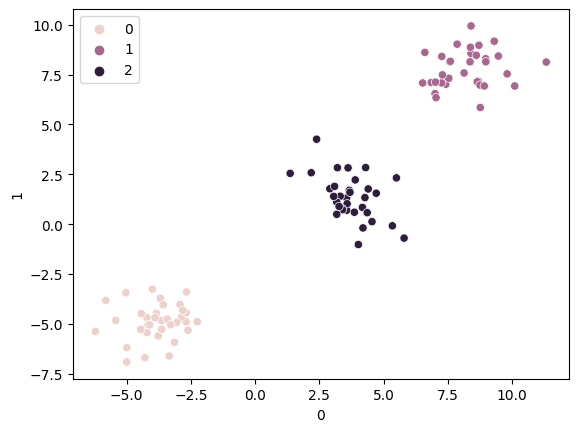

In [38]:
sns.scatterplot(x = X[0], y = X[1], hue = y) # hue 는 범례

In [39]:
# 비지도 학습
from sklearn.cluster import KMeans

In [40]:
km = KMeans(n_clusters = 3)
km.fit(X)
pred = km.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

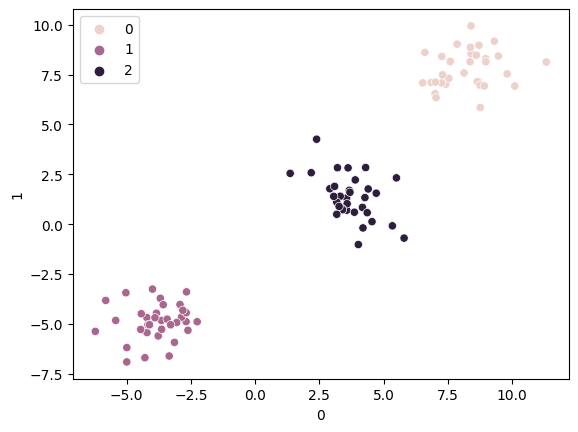

In [41]:
sns.scatterplot(x = X[0], y = X[1], hue = pred)

In [42]:
km = KMeans(n_clusters = 5)
km.fit(X)
pred = km.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='0', ylabel='1'>

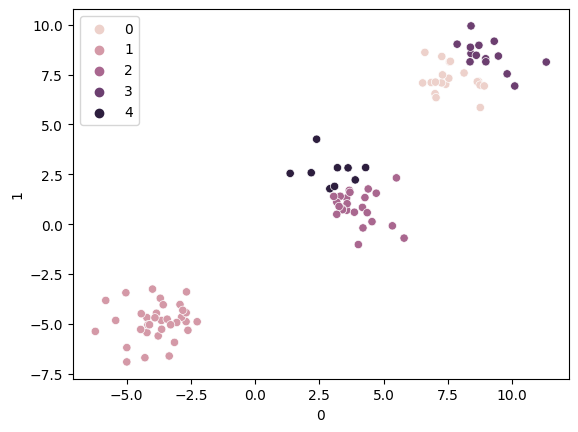

In [43]:
sns.scatterplot(x = X[0], y = X[1], hue = pred)

In [44]:
# 평가값 : 하나의 클러스터 안에 중심점으로부터 각각의 데이터 거리를 합한 값 평균
# 이 수치가 작으면 작을수록 군집화가 잘된 것! (높은 응집도!)
km.inertia_

133.11618573954877

In [45]:
# 군집을 몇 개로 할지 우리가 정하지 말고, 그걸 구해보자
# 군집의 갯수는 2~10개까지
# 반복문을 돌려서 inertia_list 안에 평가값을 다 담으면 됩니다.
inertia_list = []

for i in range(2, 11):
  km = KMeans(n_clusters = i)
  km.fit(X)
  inertia_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [46]:
inertia_list

[1208.0352593966709,
 188.93167016462732,
 160.77454287739036,
 133.53495842432042,
 111.88015847418286,
 98.11456546371886,
 85.14631122700787,
 74.06658022506016,
 65.47404078327583]

<Axes: >

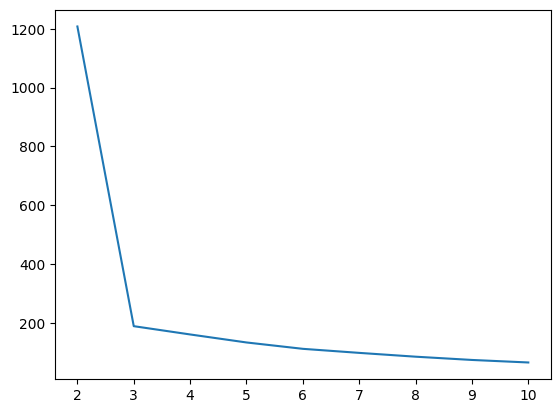

In [47]:
# 최대로 꺾이는 지점이 최적의 클러스터!
# 엘보우 기법
sns.lineplot(x = range(2, 11), y = inertia_list)

# **2. marketing 데이터셋 살펴보기**

In [48]:
mkt_df = pd.read_csv('/content/drive/MyDrive/파이썬AI프로젝트202307/4_머신러닝과 딥러닝/Data/marketing.csv')
mkt_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0


In [49]:
pd.set_option('display.max_columns', 50)

In [50]:
mkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0


In [51]:
# 쇼핑몰 고객의 데이터
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

(영어)   |   (한글)
:---:    |   :---:
ID | 고객 아이디
Year_Birth | 출생 연도
Education | 학력
Marital_Status | 결혼 여부
Income | 소득
Kidhome | 어린이 수
Teenhome | 청소년 수
Dt_Customer | 고객 등록일
Recency | 마지막 구매일로부터 경과일
MntWines | 와인 구매액
MntFruits | 과일 구매액
MntMeatProducts | 육류 제품 구매액
MntFishProducts | 어류 제품 구매액
MntSweetProducts | 단맛 제품 구매액
MntGoldProds | 골드 제품 구매액
NumDealsPurchases | 할인 행사 구매 수
NumWebPurchases | 웹에서의 구매 수
NumCatalogPurchases | 카탈로그에서의 구매 수
NumStorePurchases | 매장에서의 구매 수
NumWebVisitsMonth | 월별 웹 방문 수
Complain | 불만 여부

In [52]:
mkt_df.drop('ID', axis=1, inplace=True)

In [53]:
mkt_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [54]:
# 3명이 쪼오끔.. 그렇죠?
mkt_df.sort_values('Year_Birth')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,1
1950,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,7,0,0,6,1,3,1,4,5,0
424,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,716,55,0,21,0,7,10,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1995,Graduation,Single,71163.0,0,0,09-03-2014,30,283,17,372,138,106,44,1,3,8,12,1,0
1850,1995,2n Cycle,Single,83257.0,0,0,18-09-2012,56,536,27,590,38,107,67,1,5,10,12,6,1
696,1995,Graduation,Single,34824.0,0,0,26-03-2014,65,4,2,11,2,0,4,1,1,0,2,6,0
1170,1996,Basic,Married,14421.0,0,0,17-02-2014,81,0,0,2,3,3,8,1,1,0,2,5,0


In [55]:
mkt_df = mkt_df[mkt_df['Year_Birth'] > 1920]

In [56]:
mkt_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2237.000000,2213.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000,2237.000000
mean,1968.901654,52236.581563,0.444345,0.506482,49.104604,303.995530,26.270451,166.916853,37.523022,27.068842,43.968708,2.326777,4.087170,2.662494,5.794367,5.319177,0.008941
std,11.701917,25178.603047,0.538467,0.544593,28.956073,336.574382,39.715972,225.661158,54.639909,41.293949,52.054318,1.932923,2.779461,2.923456,3.250940,2.426386,0.094152
min,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35246.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51373.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68487.000000,1.000000,1.000000,74.000000,504.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [57]:
# 666666 만 독보적이다!
mkt_df.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0
2079,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0
2081,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0
2084,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0


In [60]:
# 아래 코드로 적으면, 결측값도 삭제된다.
# mkt_df = mkt_df[mkt_df['Income'] < 200000]

mkt_df = mkt_df[mkt_df['Income'] != 666666]

In [61]:
mkt_df.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0
2079,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0
2081,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0
2084,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0


In [62]:
mkt_df = mkt_df.dropna()

In [63]:
mkt_df.isna().mean()

Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
Complain               0.0
dtype: float64

In [64]:
# object 중에 Dt 는 데이트타임 형식으로 바꾸자!
mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'])

<ipython-input-64-371b78cd36b8>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'])


In [65]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2212 non-null   int64         
 1   Education            2212 non-null   object        
 2   Marital_Status       2212 non-null   object        
 3   Income               2212 non-null   float64       
 4   Kidhome              2212 non-null   int64         
 5   Teenhome             2212 non-null   int64         
 6   Dt_Customer          2212 non-null   datetime64[ns]
 7   Recency              2212 non-null   int64         
 8   MntWines             2212 non-null   int64         
 9   MntFruits            2212 non-null   int64         
 10  MntMeatProducts      2212 non-null   int64         
 11  MntFishProducts      2212 non-null   int64         
 12  MntSweetProducts     2212 non-null   int64         
 13  MntGoldProds         2212 non-nul

In [69]:
mkt_df['Dt_Customer'].max().year

2014

In [70]:
# 마지막으로 가입된 사람(이게 오늘이라고 가정!)을 기준으로 현재 데이터의 가입 날짜(달) 구하기
mkt_df['pass_month'] = (mkt_df['Dt_Customer'].max().year * 12 + mkt_df['Dt_Customer'].max().month) - (mkt_df['Dt_Customer'].dt.year * 12 + mkt_df['Dt_Customer'].dt.month)

In [71]:
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,32
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,4
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,16
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,2
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,11


In [72]:
# 원 핫 인코딩을 진행할 필요 없다.
mkt_df.drop('Dt_Customer', axis=1, inplace = True)

In [73]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2212 non-null   int64  
 1   Education            2212 non-null   object 
 2   Marital_Status       2212 non-null   object 
 3   Income               2212 non-null   float64
 4   Kidhome              2212 non-null   int64  
 5   Teenhome             2212 non-null   int64  
 6   Recency              2212 non-null   int64  
 7   MntWines             2212 non-null   int64  
 8   MntFruits            2212 non-null   int64  
 9   MntMeatProducts      2212 non-null   int64  
 10  MntFishProducts      2212 non-null   int64  
 11  MntSweetProducts     2212 non-null   int64  
 12  MntGoldProds         2212 non-null   int64  
 13  NumDealsPurchases    2212 non-null   int64  
 14  NumWebPurchases      2212 non-null   int64  
 15  NumCatalogPurchases  2212 non-null   i

In [74]:
# 구입한 갯수를 통째로 묶어버리자.
mkt_df['Total_mnt'] = mkt_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis = 1)

In [75]:
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,32,1617
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,4,27
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,16,776
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,2,53
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,11,422


In [76]:
# 자식도 합칩시다.
mkt_df['Children'] = mkt_df[['Kidhome', 'Teenhome']].sum(axis = 1)

In [77]:
mkt_df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,32,1617,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,4,27,2
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,16,776,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,2,53,1
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,11,422,1


In [78]:
mkt_df.drop(['Kidhome', 'Teenhome'], axis = 1, inplace = True)

In [79]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2212 non-null   int64  
 1   Education            2212 non-null   object 
 2   Marital_Status       2212 non-null   object 
 3   Income               2212 non-null   float64
 4   Recency              2212 non-null   int64  
 5   MntWines             2212 non-null   int64  
 6   MntFruits            2212 non-null   int64  
 7   MntMeatProducts      2212 non-null   int64  
 8   MntFishProducts      2212 non-null   int64  
 9   MntSweetProducts     2212 non-null   int64  
 10  MntGoldProds         2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [80]:
mkt_df['Education'].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [81]:
mkt_df['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [82]:
# 두가지로 나누자!
mkt_df['Marital_Status'] = mkt_df['Marital_Status'].replace({
    'Married':'Partner',
    'Together':'Partner',
    'Single':'Single',
    'Divorced':'Single',
    'Widow':'Single',
    'Alone':'Single',
    'Absurd':'Single',
    'YOLO':'Single'
})

In [83]:
mkt_df['Marital_Status'].value_counts()

Partner    1428
Single      784
Name: Marital_Status, dtype: int64

In [84]:
# 원핫인코딩 진행!
mkt_df = pd.get_dummies(mkt_df, columns = ['Education', 'Marital_Status'])

In [85]:
mkt_df.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,32,1617,0,0,0,1,0,0,0,1
1,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,4,27,2,0,0,1,0,0,0,1
2,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,16,776,0,0,0,1,0,0,1,0
3,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,2,53,1,0,0,1,0,0,1,0
4,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,11,422,1,0,0,0,0,1,1,0


# **스케일링**

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
ss = StandardScaler()

In [88]:
ss.fit_transform(mkt_df)

array([[-1.01835202,  0.28710487,  0.31035323, ..., -0.52643733,
        -1.34960312,  1.34960312],
       [-1.27478522, -0.26088203, -0.38081349, ..., -0.52643733,
        -1.34960312,  1.34960312],
       [-0.33453017,  0.9131964 , -0.79551352, ..., -0.52643733,
         0.74095857, -0.74095857],
       ...,
       [ 1.03311355,  0.23334696,  1.45077832, ..., -0.52643733,
        -1.34960312,  1.34960312],
       [-1.10382975,  0.80317156, -1.41756357, ..., -0.52643733,
         0.74095857, -0.74095857],
       [-1.27478522,  0.04229031, -0.31169682, ...,  1.89956135,
         0.74095857, -0.74095857]])

In [89]:
# 컬럼 지정 전!
pd.DataFrame(ss.fit_transform(mkt_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,-1.018352,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.09552,1.936840,1.676245,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
1,-1.274785,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.09552,-1.714136,-0.963297,1.404572,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
2,-0.334530,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.09552,-0.149432,0.280110,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
3,1.289547,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.09552,-1.974920,-0.920135,0.069987,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
4,1.033114,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.09552,-0.801392,-0.307562,0.069987,-0.313547,-0.158187,-1.008171,-0.444542,1.899561,0.740959,-0.740959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.163575,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,-0.09552,0.111352,1.218061,0.069987,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
2208,-1.958607,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-0.09552,-1.974920,-0.271040,2.739158,-0.313547,-0.158187,-1.008171,-0.444542,1.899561,0.740959,-0.740959
2209,1.033114,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.09552,-0.801392,1.052052,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
2210,-1.103830,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.09552,-0.801392,0.391336,0.069987,-0.313547,-0.158187,-1.008171,2.249505,-0.526437,0.740959,-0.740959


In [90]:
ss_df = pd.DataFrame(ss.fit_transform(mkt_df), columns = mkt_df.columns)
ss_df

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single
0,-1.018352,0.287105,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,-0.09552,1.936840,1.676245,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
1,-1.274785,-0.260882,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,-0.09552,-1.714136,-0.963297,1.404572,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
2,-0.334530,0.913196,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,-0.09552,-0.149432,0.280110,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
3,1.289547,-1.176114,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-0.09552,-1.974920,-0.920135,0.069987,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
4,1.033114,0.294307,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-0.09552,-0.801392,-0.307562,0.069987,-0.313547,-0.158187,-1.008171,-0.444542,1.899561,0.740959,-0.740959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.163575,0.430444,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,3.928291,-0.168701,1.791619,0.111982,-0.555814,-0.132545,-0.09552,0.111352,1.218061,0.069987,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,0.740959,-0.740959
2208,-1.958607,0.560123,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,-0.694954,2.429954,1.426865,-0.229679,-0.248141,0.692181,-0.09552,-1.974920,-0.271040,2.739158,-0.313547,-0.158187,-1.008171,-0.444542,1.899561,0.740959,-0.740959
2209,1.033114,0.233347,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,-0.385448,-0.688432,-0.761665,0.111982,2.213242,0.279818,-0.09552,-0.801392,1.052052,-1.264598,-0.313547,-0.158187,0.991895,-0.444542,-0.526437,-1.349603,1.349603
2210,-1.103830,0.803172,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,0.330284,-0.168701,0.697355,0.795303,1.290224,-0.957271,-0.09552,-0.801392,0.391336,0.069987,-0.313547,-0.158187,-1.008171,2.249505,-0.526437,0.740959,-0.740959


# **3. KMeans**
- k개의 중심점을 찍은 후에, 이 중심점에서 각 점간의 거리의 합이 가장 최소가 되는 중심점 k의 위치를 찾고, 이 중심점에서 가까운 점들을 중심점을 기준으로 묶는 알고리즘
- k개의 클러스터의 수는 정해줘야 함

In [91]:
inertia_list = []

for i in range(2, 11):
  km = KMeans(n_clusters = i, random_state = 49)
  km.fit(ss_df)
  inertia_list.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [92]:
inertia_list

[42846.40649829607,
 39772.54650122028,
 37572.871065759326,
 36287.42259587959,
 34223.112888957316,
 32982.48314294578,
 31748.162401640097,
 29873.58235457995,
 29392.918531857424]

<Axes: >

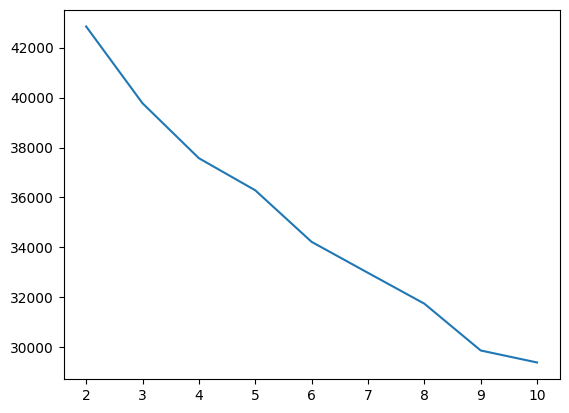

In [93]:
# 눈으로 판단이 안될 때, 군집을 평가하는 방법이 있다!
sns.lineplot(x=range(2, 11), y=inertia_list)

# **4. 실루엣 스코어(Silhouette Score)**
- 각 군집 간의 거리가 얼마나 효율적으로 분리 되어있는지를 나타냄
- 실루엣 분석은 실루엣 계수를 기반으로 하는데, 실루엣 계수는 개별 데이터가 가지는 군집화 지표

In [94]:
from sklearn.metrics import silhouette_score

In [97]:
score = []

for i in range(2, 11):
  km = KMeans(n_clusters = i, random_state = 49)
  km.fit(ss_df)
  pred = km.predict(ss_df) # 추가!
  score.append(silhouette_score(ss_df, pred))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [98]:
# 높을수록 좋다!
score

[0.2301916858024372,
 0.1428881027741706,
 0.11918432590913589,
 0.12245410044841974,
 0.14314236979620867,
 0.12601938976299262,
 0.13850150075214332,
 0.12671865765649967,
 0.1450203964262588]

<Axes: >

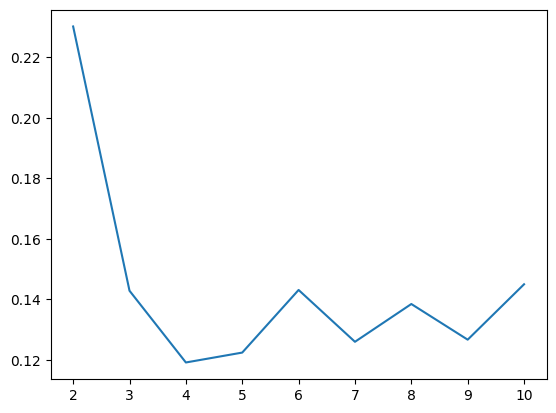

In [99]:
sns.lineplot(x=range(2, 11), y=score)

In [101]:
km = KMeans(n_clusters = 6, random_state = 49)

In [102]:
km.fit(ss_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=49)

In [103]:
pred = km.predict(ss_df)
pred

array([0, 3, 2, ..., 2, 2, 1], dtype=int32)

In [104]:
mkt_df['label'] = pred
mkt_df

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,pass_month,Total_mnt,Children,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Partner,Marital_Status_Single,label
0,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,32,1617,0,0,0,1,0,0,0,1,0
1,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,4,27,2,0,0,1,0,0,0,1,3
2,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,16,776,0,0,0,1,0,0,1,0,2
3,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,2,53,1,0,0,1,0,0,1,0,3
4,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,11,422,1,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,0,18,1341,1,0,0,1,0,0,1,0,2
2236,1946,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,0,2,444,3,0,0,0,0,1,1,0,1
2237,1981,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,0,11,1241,0,0,0,1,0,0,0,1,2
2238,1956,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,0,11,843,1,0,0,0,1,0,1,0,2


In [105]:
mkt_df['label'].value_counts()

3    668
0    522
2    454
1    271
5    243
4     54
Name: label, dtype: int64